# AccelerateAI - Data Science Global Bootcamp

### Logistic Regression Model Diagnostics

In [1]:
# Required libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

### About the attrition dataset
This dataset contains employee and company data - that is used to model attrition.
Attrition - whether an employee left or not - is included and can be used as the target variable.

In [2]:
# Load the dataset
attrition_df = pd.read_csv("employee_attrition.csv")
attrition_df.head().T

,0,1,2,3,4
EmployeeID,1313919,1200302,1060315,1272912,1414939
Attrition,0,0,1,0,0
Age,41,49,37,33,27
Gender,Female,Male,Male,Female,Male
MaritalStatus,Single,Married,Single,Married,Married
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EnvironmentSatisfaction,2,3,4,4,1
JobInvolvement,3,2,2,3,3


In [3]:
# Categorical variables have to be converted to dummies, before passing into the model.
cat_var = ['Gender' ,'MaritalStatus', 'BusinessTravel', 'Education', 'EnvironmentSatisfaction',
          'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'WorkLifeBalance']

# Numerical Variables
num_var = ['Age', 'MonthlyIncome','NumCompaniesWorked', 'TotalWorkingYears', 
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
           'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [4]:
model_df = pd.get_dummies(data=attrition_df, 
                          columns=cat_var,
                          drop_first = True)
model_df.drop(columns='EmployeeID', inplace=True)

In [5]:
model_df.columns

Index(['Attrition', 'Age', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Male', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4',
       'JobInvolvement_2', 'JobInvolvement_3', 'JobInvolvement_4',
       'JobLevel_2', 'JobLevel_3', 'JobLevel_4', 'JobLevel_5',
       'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4',
       'PerformanceRating_4', 'WorkLifeBalance_2', 'WorkLifeBalance_3',
       'WorkLifeBalance_4'],
      dtype='object')

In [6]:
Y = model_df['Attrition']
X = model_df.drop(columns='Attrition')
X = sm.add_constant(X)

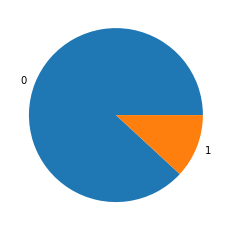

In [7]:
#Distrubution of Attrition variable
y_freq = Y.value_counts()
plt.pie(y_freq, labels=y_freq.index )
plt.show() 

In [8]:
# Fit the logit model
logit_model = sm.Logit(Y,X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.228646
         Iterations 9


In [9]:
 print(result.summary2())

                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.373     
Dependent Variable:      Attrition             AIC:                   840.4205  
Date:                    2022-09-13 19:53      BIC:                   1041.1147 
No. Observations:        1676                  Log-Likelihood:        -383.21   
Df Model:                36                    LL-Null:               -610.73   
Df Residuals:            1639                  LLR p-value:           5.5133e-74
Converged:               1.0000                Scale:                 1.0000    
No. Iterations:          9.0000                                                 
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                             4.4296   0.8865  4.9965 0.0

### Model Diagnostics:
#### 1. Likelihood Ratio Test: The LLR-p-value is 5.51e-74 (<<0.05), indicating that the model overall is significant.
#### 2. Wald's Test: We see that many variable have p-value corresponding to the Wlad's test >0.05. We will remove those and retrain the model. 

In [10]:
def get_significant_vars(model, alpha=0.05):
    
    #store the variable and p-values in a dataframe
    p_vals = pd.DataFrame(model.pvalues)  
    p_vals['vars'] = p_vals.index
    p_vals.columns = ['pval', 'name']
    
    #return those that are significant at alpha value
    return list(p_vals[p_vals.pval <= alpha]['name'])

In [11]:
significant_vars = get_significant_vars(result)

In [12]:
# Fit the logit model
X_new = X[significant_vars] #constant is already added          

logit_model = sm.Logit(Y,X_new)
final_model = logit_model.fit()
print(final_model.summary2())

Optimization terminated successfully.
         Current function value: 0.237396
         Iterations 8
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.349     
Dependent Variable:      Attrition             AIC:                   845.7522  
Date:                    2022-09-13 19:53      BIC:                   981.3563  
No. Observations:        1676                  Log-Likelihood:        -397.88   
Df Model:                24                    LL-Null:               -610.73   
Df Residuals:            1651                  LLR p-value:           3.8865e-75
Converged:               1.0000                Scale:                 1.0000    
No. Iterations:          8.0000                                                 
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------

**Now all variables except one (WorkLifeBalance_4 : p-val - 0.1578)  are significant.**

#### 3. Residual Plots - Deviance and Pearson Residual

Text(0, 0.5, 'Studentized Pearson Residuals')

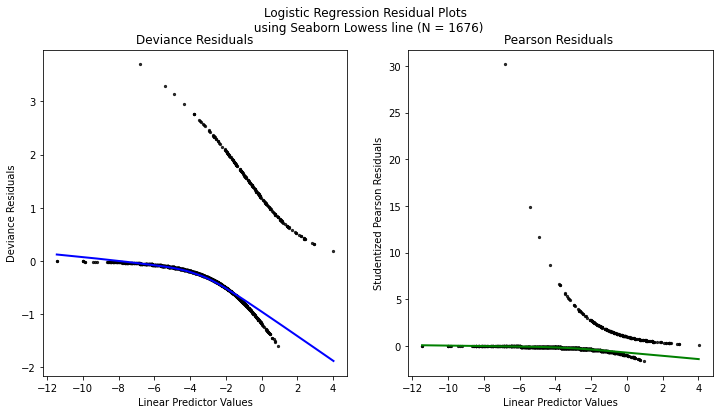

In [13]:
import warnings
warnings.filterwarnings("ignore") 

## Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(1,2, figsize=(12,6))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 1676)")

# Deviance Residuals
sns.regplot(final_model.fittedvalues, final_model.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(final_model.fittedvalues, final_model.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Pearson Residuals ")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

### The above shows there are many outliers in the data.

In [14]:
final_model.resid_pearson

0      -0.321540
1      -0.084577
2       1.615205
3      -0.130072
4      -0.672283
          ...   
1671    0.334224
1672   -0.089409
1673   -1.396497
1674   -0.091785
1675   -0.109340
Length: 1676, dtype: float64

In [20]:
# Let's look at few outlier observations
extreme = final_model.resid_pearson > 3
X_new[extreme].head(10)

,const,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,MaritalStatus_Single,...,JobInvolvement_3,JobInvolvement_4,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,WorkLifeBalance_3,WorkLifeBalance_4
36,1.0,50,3,2683,1,3,2,2,0,0,...,0,0,0,0,0,0,1,0,1,0
100,1.0,37,6,2073,4,7,3,2,0,0,...,1,0,0,0,0,0,0,0,1,0
107,1.0,25,5,5744,1,6,1,4,0,1,...,0,0,0,0,0,0,1,0,1,0
122,1.0,56,14,4963,9,7,2,4,4,0,...,1,0,0,0,0,1,0,0,1,0
204,1.0,38,29,6673,7,17,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0
234,1.0,33,14,2436,5,8,2,4,0,0,...,1,0,0,0,0,0,0,1,0,0
236,1.0,33,2,2707,7,13,3,7,1,0,...,1,0,0,0,0,0,0,0,0,1
293,1.0,26,4,5828,1,8,0,7,7,1,...,0,0,0,0,0,0,0,1,1,0
327,1.0,39,3,5238,4,12,3,0,0,0,...,1,0,0,0,0,0,1,0,0,0
434,1.0,33,15,13610,7,15,2,6,7,0,...,1,0,1,0,0,0,1,0,0,1


In [17]:
# How does the prediction look like?
Y_pred = final_model.predict(X_new)
Y_pred[Y_prob > 0.5] = 1
Y_pred[Y_prob <= 0.5] = 0

In [18]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1477
           1       0.73      0.34      0.47       199

    accuracy                           0.91      1676
   macro avg       0.82      0.66      0.71      1676
weighted avg       0.90      0.91      0.89      1676



### The overall accuracy is good at 0.91, however give the data is imbalanced, we can see the model is not doing very well in predicting attrition(1) - recall is just 0.31. 

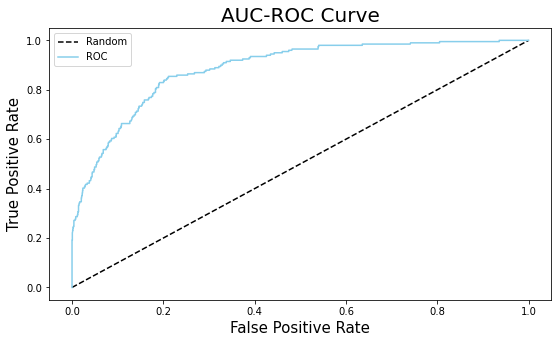

In [19]:
from sklearn.metrics import roc_curve

Y_prob = final_model.predict(X_new)
fpr, tpr, thresholds = roc_curve(Y, Y_prob)

plt.figure(figsize=(9,5))
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.plot(fpr, tpr, color = 'skyblue', label = 'ROC')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('AUC-ROC Curve', fontsize=20)
plt.legend(fontsize=10, loc='best')
plt.show()

In [21]:
# We can try Oversampling and then retrain the model. Also the outliers should be removed/treated.

***